In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  



from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,
                             average_precision_score, precision_recall_curve, roc_curve,
                             confusion_matrix, classification_report)

In [2]:
import joblib

# Load trained models
log_reg = joblib.load("../models/log_reg.pkl")
dt = joblib.load("../models/dt.pkl")
rf = joblib.load("../models/rf.pkl")
svm = joblib.load("../models/svm.pkl")
gb = joblib.load("../models/gb.pkl")

# Load test data
X_test_clean = joblib.load("../models/X_test_clean.pkl")
y_test = joblib.load("../models/y_test.pkl")

print("Models and test data loaded successfully!")
print(f"Test set size: {X_test_clean.shape}")
print(f"Test label distribution:\n{y_test.value_counts()}")

Models and test data loaded successfully!
Test set size: (1826, 15)
Test label distribution:
_label_encoded
0    981
1    845
Name: count, dtype: int64


In [4]:
def evaluate(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"{model_name} Evaluation\n")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")
    print(f"PR-AUC:    {average_precision_score(y_test, y_prob):.4f}")
    print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"\n{classification_report(y_test, y_pred)}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    axes[0].plot(fpr, tpr)
    axes[0].set_title(f"ROC Curve — {model_name}")
    axes[0].set_xlabel("FPR"); axes[0].set_ylabel("TPR")

    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    axes[1].plot(rec, prec)
    axes[1].set_title(f"PR Curve — {model_name}")
    axes[1].set_xlabel("Recall"); axes[1].set_ylabel("Precision")

    plt.tight_layout()
    plt.show()

Logistic Regression Evaluation

Precision: 0.8754
Recall:    0.8651
F1 Score:  0.8702
ROC-AUC:   0.9553
PR-AUC:    0.9425

Confusion Matrix:
[[877 104]
 [114 731]]

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       981
           1       0.88      0.87      0.87       845

    accuracy                           0.88      1826
   macro avg       0.88      0.88      0.88      1826
weighted avg       0.88      0.88      0.88      1826



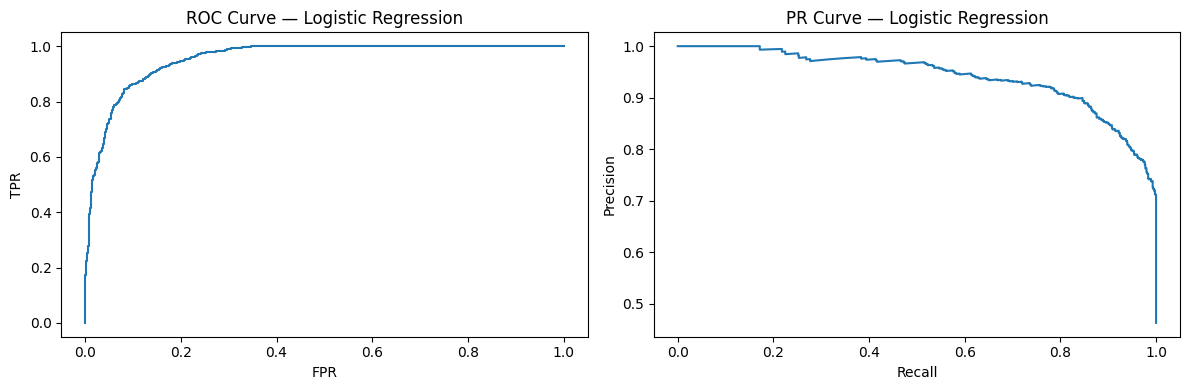

In [5]:
evaluate(log_reg, X_test_clean, y_test, "Logistic Regression")

Decision Tree Evaluation

Precision: 0.9040
Recall:    0.9467
F1 Score:  0.9249
ROC-AUC:   0.9704
PR-AUC:    0.9445

Confusion Matrix:
[[896  85]
 [ 45 800]]

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       981
           1       0.90      0.95      0.92       845

    accuracy                           0.93      1826
   macro avg       0.93      0.93      0.93      1826
weighted avg       0.93      0.93      0.93      1826



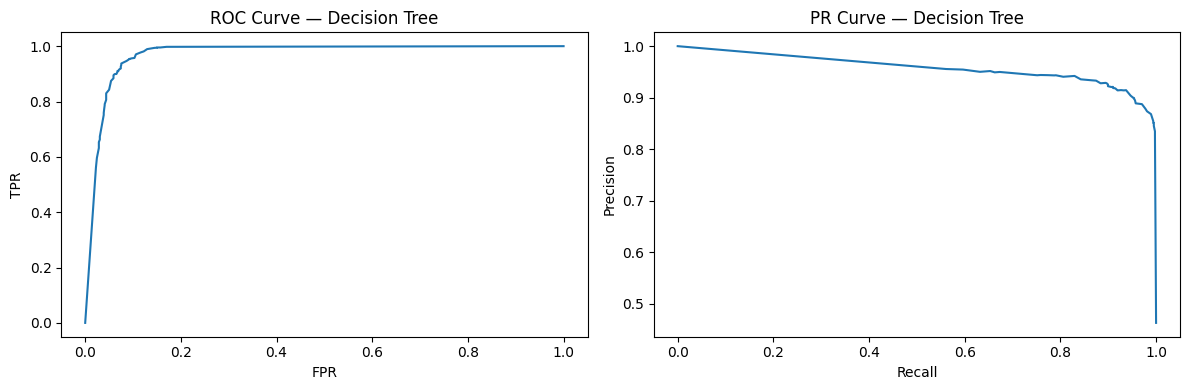

In [6]:
evaluate(dt, X_test_clean, y_test, "Decision Tree")

Random Forest Evaluation

Precision: 0.9336
Recall:    0.9822
F1 Score:  0.9573
ROC-AUC:   0.9917
PR-AUC:    0.9886

Confusion Matrix:
[[922  59]
 [ 15 830]]

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       981
           1       0.93      0.98      0.96       845

    accuracy                           0.96      1826
   macro avg       0.96      0.96      0.96      1826
weighted avg       0.96      0.96      0.96      1826



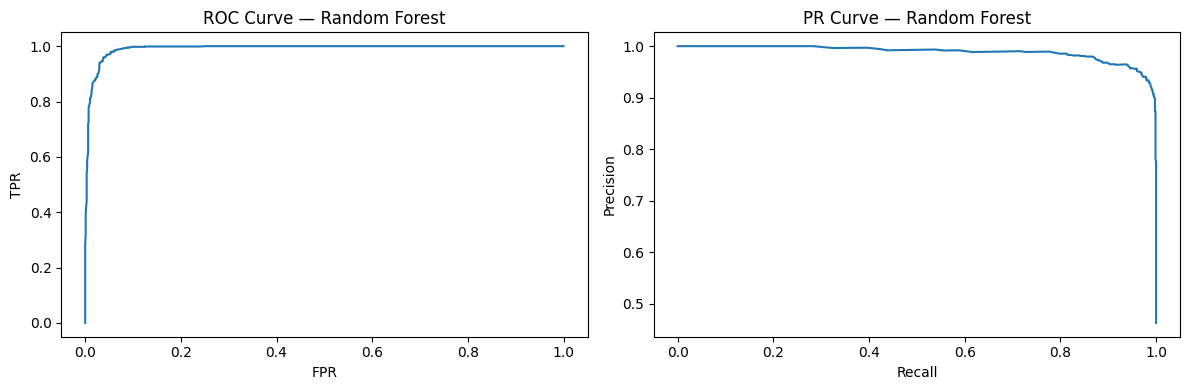

In [7]:
evaluate(rf, X_test_clean, y_test, "Random Forest")

SVM Evaluation

Precision: 0.8790
Recall:    0.9195
F1 Score:  0.8988
ROC-AUC:   0.9674
PR-AUC:    0.9547

Confusion Matrix:
[[874 107]
 [ 68 777]]

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       981
           1       0.88      0.92      0.90       845

    accuracy                           0.90      1826
   macro avg       0.90      0.91      0.90      1826
weighted avg       0.91      0.90      0.90      1826



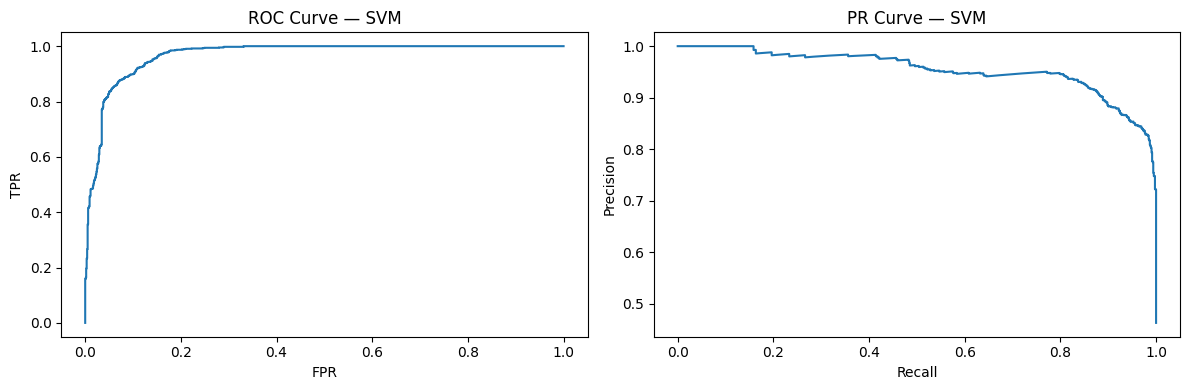

In [8]:
evaluate(svm, X_test_clean, y_test, "SVM")

Gradient Boosting Evaluation

Precision: 0.9283
Recall:    0.9799
F1 Score:  0.9534
ROC-AUC:   0.9870
PR-AUC:    0.9807

Confusion Matrix:
[[917  64]
 [ 17 828]]

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       981
           1       0.93      0.98      0.95       845

    accuracy                           0.96      1826
   macro avg       0.96      0.96      0.96      1826
weighted avg       0.96      0.96      0.96      1826



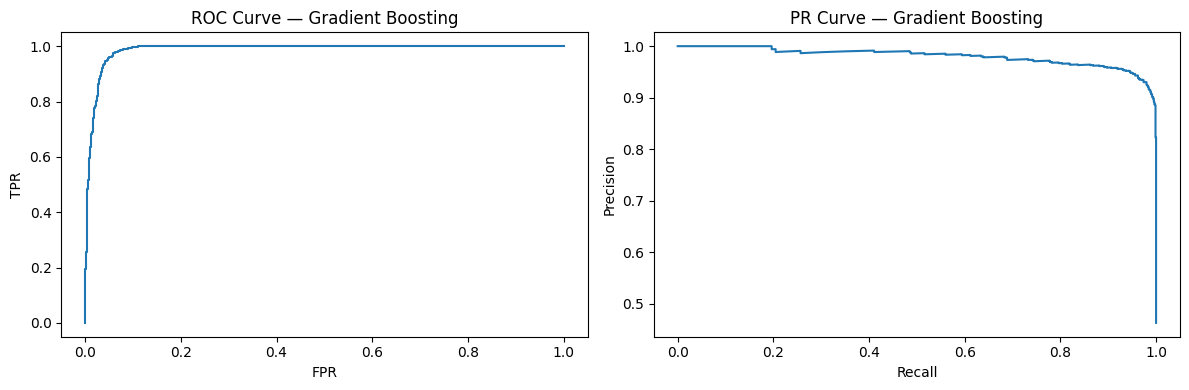

In [9]:
evaluate(gb, X_test_clean, y_test, "Gradient Boosting")

In [10]:
# Summary Report for All 5 Models

def generate_report(models_dict, X_test, y_test):
    """Generate a comparison report for multiple models."""
    results = []
    
    for name, model in models_dict.items():
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        results.append({
            "Model": name,
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_prob),
            "PR-AUC": average_precision_score(y_test, y_prob)
        })
    
    return pd.DataFrame(results).round(4)

#all 5 models
report_models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Gradient Boosting": gb
}

print("MODEL COMPARISON REPORT (All 5 Models)\n")

report_df = generate_report(report_models, X_test_clean, y_test)
display(report_df)

MODEL COMPARISON REPORT (All 5 Models)



,Model,Precision,Recall,F1 Score,ROC-AUC,PR-AUC
0,Logistic Regression,0.8754,0.8651,0.8702,0.9553,0.9425
1,Decision Tree,0.9040,0.9467,0.9249,0.9704,0.9445
2,Random Forest,0.9336,0.9822,0.9573,0.9917,0.9886
3,SVM,0.8790,0.9195,0.8988,0.9674,0.9547
4,Gradient Boosting,0.9283,0.9799,0.9534,0.9870,0.9807


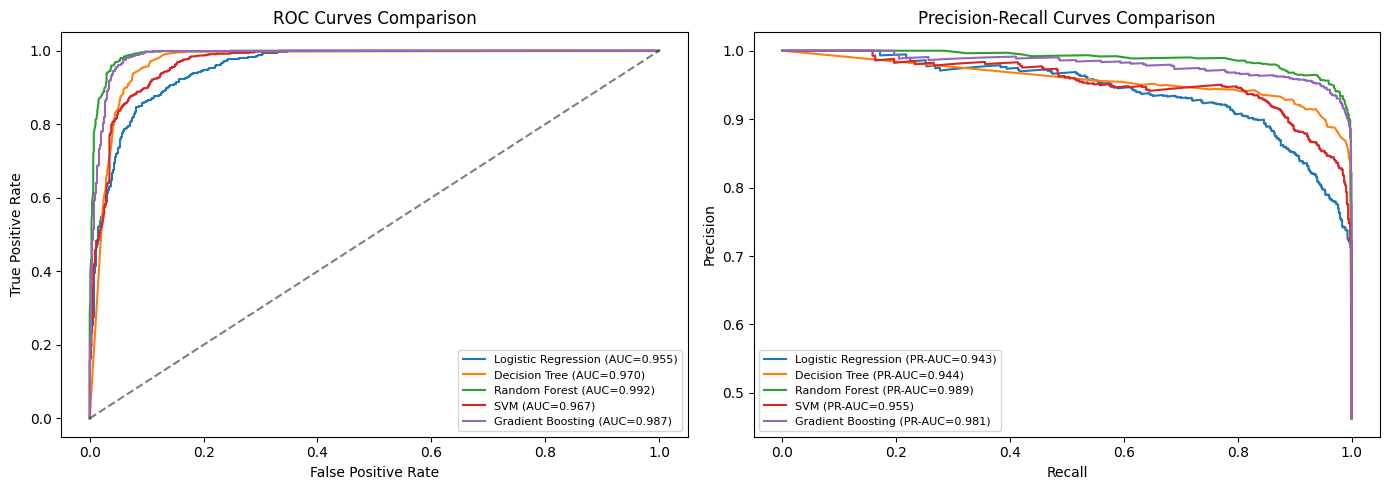

In [11]:
# ROC and PR Curves Comparison

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for name, model in report_models.items():
    y_prob = model.predict_proba(X_test_clean)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right", fontsize=8)

plt.subplot(1, 2, 2)
for name, model in report_models.items():
    y_prob = model.predict_proba(X_test_clean)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(rec, prec, label=f"{name} (PR-AUC={pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Comparison")
plt.legend(loc="lower left", fontsize=8)

plt.tight_layout()
plt.show()

In [12]:
# Get predictions and probabilities
y_pred_rf = rf.predict(X_test_clean)
y_prob_rf = rf.predict_proba(X_test_clean)[:, 1]

# Create analysis dataframe
analysis_df = X_test_clean.copy()
analysis_df['actual'] = y_test.values
analysis_df['predicted'] = y_pred_rf
analysis_df['fraud_probability'] = y_prob_rf

# False Positives: predicted fraud (1) but actually legitimate (0)
false_positives = analysis_df[(analysis_df['predicted'] == 1) & (analysis_df['actual'] == 0)]
false_positives = false_positives.sort_values('fraud_probability', ascending=False)

# False Negatives: predicted legitimate (0) but actually fraud (1)
false_negatives = analysis_df[(analysis_df['predicted'] == 0) & (analysis_df['actual'] == 1)]
false_negatives = false_negatives.sort_values('fraud_probability', ascending=True)

print("ERROR ANALYSIS OVERVIEW")
print(f"Total Test Samples: {len(analysis_df)}")
print(f"Total False Positives: {len(false_positives)}")
print(f"Total False Negatives: {len(false_negatives)}")

ERROR ANALYSIS OVERVIEW
Total Test Samples: 1826
Total False Positives: 59
Total False Negatives: 15


In [13]:
# FALSE POSITIVES: Legitimate providers wrongly flagged as fraud

print("FALSE POSITIVE CASE STUDIES\n")

fp_cases = false_positives.head(3)
feature_cols = [c for c in fp_cases.columns if c not in ['actual', 'predicted', 'fraud_probability']]

for i, (idx, row) in enumerate(fp_cases.iterrows(), 1):
    print(f"Case FP-{i}: Fraud Score = {row['fraud_probability']:.0%}, Actual = Legitimate")
    top_features = row[feature_cols].abs().nlargest(3)
    print(f"  Contributing features: {', '.join(top_features.index[:3])}")
    print()

FALSE POSITIVE CASE STUDIES

Case FP-1: Fraud Score = 99%, Actual = Legitimate
  Contributing features: total_sum_amt, in_sum_amt, in_mean_amt

Case FP-2: Fraud Score = 98%, Actual = Legitimate
  Contributing features: total_sum_amt, in_sum_amt, in_std_amt

Case FP-3: Fraud Score = 98%, Actual = Legitimate
  Contributing features: total_sum_amt, in_sum_amt, in_std_amt



In [14]:
# FALSE NEGATIVES: Fraudulent providers missed by the model

print("FALSE NEGATIVE CASE STUDIES\n")

fn_cases = false_negatives.head(3)
feature_cols = [c for c in fn_cases.columns if c not in ['actual', 'predicted', 'fraud_probability']]

for i, (idx, row) in enumerate(fn_cases.iterrows(), 1):
    print(f"Case FN-{i}: Fraud Score = {row['fraud_probability']:.0%}, Actual = Fraud")
    top_features = row[feature_cols].abs().nlargest(3)
    print(f"  Features that looked normal: {', '.join(top_features.index[:3])}")
    print()

FALSE NEGATIVE CASE STUDIES

Case FN-1: Fraud Score = 4%, Actual = Fraud
  Features that looked normal: in_sum_amt, total_sum_amt, in_mean_amt

Case FN-2: Fraud Score = 27%, Actual = Fraud
  Features that looked normal: total_sum_amt, in_sum_amt, out_sum_amt

Case FN-3: Fraud Score = 37%, Actual = Fraud
  Features that looked normal: total_sum_amt, in_sum_amt, out_sum_amt



In [15]:
# Recommendations for Future Model Improvements
"""
Based on our error analysis of false positives and false negatives:

TO REDUCE FALSE POSITIVES:
- Add provider specialty info to avoid flagging legitimate high-billers
- Include peer comparison features (compare to similar providers)
- Use a secondary review step for borderline cases

TO REDUCE FALSE NEGATIVES:
- Add temporal features to catch gradual fraud escalation
- Include claim-level variance (not just averages)
- Consider lowering the threshold for high-risk cases

ADDITIONAL FEATURES TO CONSIDER:
- Provider billing history trends
- Patient overlap between providers
- Procedure code diversity scores

These refinements would help the model better distinguish between 
legitimate unusual patterns and actual fraudulent behavior.
"""

'\nBased on our error analysis of false positives and false negatives:\n\nTO REDUCE FALSE POSITIVES:\n- Add provider specialty info to avoid flagging legitimate high-billers\n- Include peer comparison features (compare to similar providers)\n- Use a secondary review step for borderline cases\n\nTO REDUCE FALSE NEGATIVES:\n- Add temporal features to catch gradual fraud escalation\n- Include claim-level variance (not just averages)\n- Consider lowering the threshold for high-risk cases\n\nADDITIONAL FEATURES TO CONSIDER:\n- Provider billing history trends\n- Patient overlap between providers\n- Procedure code diversity scores\n\nThese refinements would help the model better distinguish between \nlegitimate unusual patterns and actual fraudulent behavior.\n'